In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load Data
df = pd.read_csv("TASK-ML-INTERN.csv")

# Preview Data
print(df.head())
print(df.info())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [3]:
print(df.columns)

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values only in numeric columns
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# Define the target column correctly
target_column = "vomitoxin_ppb"

# Drop identifier column if not needed
X = df.drop(columns=["hsi_id", target_column])
y = df[target_column]

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features

# Convert back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Explained variance: [0.87077909 0.05849069]


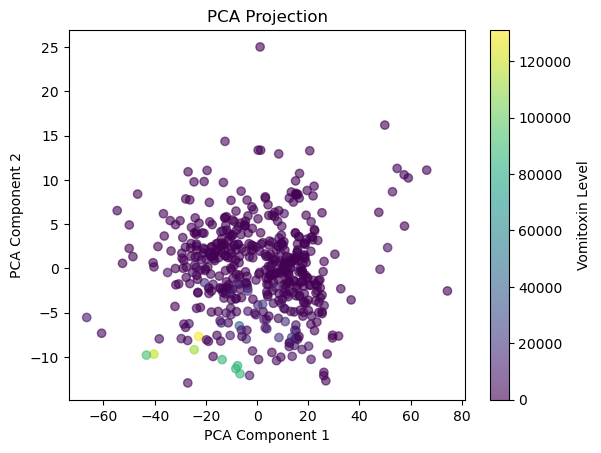

In [6]:
pca = PCA(n_components=2)  # Reduce to 2D
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance: {pca.explained_variance_ratio_}")

# Visualize PCA results
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection")
plt.colorbar(label="Vomitoxin Level")
plt.show()

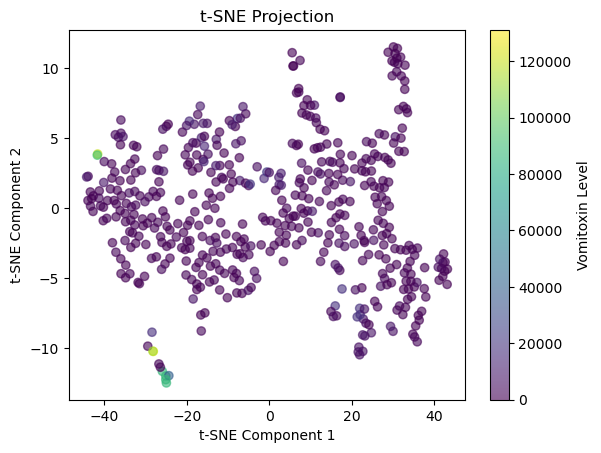

In [7]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis", alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection")
plt.colorbar(label="Vomitoxin Level")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
import joblib
joblib.dump(model, "don_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

MAE: 3765.057, RMSE: 11483.806, R²: 0.528


In [12]:
# Apply log transformation to stabilize variance
df["vomitoxin_ppb"] = np.log1p(df["vomitoxin_ppb"])  # log(1 + x) to avoid log(0) issues

# Define target variable
target_column = "vomitoxin_ppb"
X = df.drop(columns=["hsi_id", target_column])  
y = df[target_column]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=10, cv=3, scoring="r2", verbose=2, random_state=42)
grid_search.fit(X_scaled, y)

# Best model
rf_model = grid_search.best_estimator_
print("Best RF Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  16.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  14.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  16.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.5s
[CV] END max_depth

In [17]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_scaled, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
import tensorflow as tf
from tensorflow import keras

nn_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_scaled.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer="adam", loss="mse")
nn_model.fit(X_scaled, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


C:\Users\Arsh Chadha\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21.3413
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0889 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0374
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7703
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2898
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3687
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3001 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8448 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3294 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0865 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4130 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1146 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8394 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0682 
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9864 
Epoch 16/50
16

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluate models
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf_model, X_scaled, y)
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(xgb_model, X_scaled, y)
nn_mae, nn_rmse, nn_r2 = evaluate_model(nn_model, X_scaled, y)

print(f"Random Forest -> MAE: {rf_mae:.3f}, RMSE: {rf_rmse:.3f}, R²: {rf_r2:.3f}")
print(f"XGBoost -> MAE: {xgb_mae:.3f}, RMSE: {xgb_rmse:.3f}, R²: {xgb_r2:.3f}")
print(f"Neural Network -> MAE: {nn_mae:.3f}, RMSE: {nn_rmse:.3f}, R²: {nn_r2:.3f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Random Forest -> MAE: 1.057, RMSE: 1.397, R²: 0.776
XGBoost -> MAE: 0.365, RMSE: 0.486, R²: 0.973
Neural Network -> MAE: 1.139, RMSE: 1.449, R²: 0.759


In [20]:
import joblib

# Choose the best model (highest R²)
best_model = rf_model if rf_r2 > max(xgb_r2, nn_r2) else (xgb_model if xgb_r2 > nn_r2 else nn_model)

joblib.dump(best_model, "don_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']